# Import Dataset & EDA Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from Telco_Customer_Churn.step_2_data_cleaning.processed_data import processed_data

In [1]:
import os
print(os.getcwd()) 

c:\Users\HP Pavilion Gaming\Documents\Machine_Learning_Projects\Telco_Customer_Churn\step_3_EDA_to_Modeling


## EDA
* Performing EDA on churn dataset
* Determining variables before modeling

In [3]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def new_churn_data(data_path):
    # Read dataset
    df = pd.read_csv(data_path)

    # Empty dummy columns list
    col_list = list(df.columns)
    encode_list = []

    # Fill the dummy list with categorical variables 
    # Assumption if there are no more than 3 unique categories in the column
    for col in col_list:
        if df[col].nunique() <= 3:
            encode_list.append(col)

    ## Encoder
    label_encoder = LabelEncoder()

    # Create a DataFrame with the encoded columns
    df_proc = df.copy()
    for col in encode_list:
        df_proc[col] = label_encoder.fit_transform(df[col])

    df_proc = df_proc.drop('Unnamed: 21', axis=1)

    return df_proc

In [4]:
data = new_churn_data("telco-cust-churn-dataset-for-cleaning.csv")

In [33]:
enc = OneHotEncoder(sparse=False, drop='first')

encoded_col = enc.fit_transform(data[['PaymentMethod']])

# Convert the result to a DataFrame for better readability
encoded_df = pd.DataFrame(encoded_col, columns=enc.get_feature_names_out(['PaymentMethod']))

C:\Users\HP Pavilion Gaming\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
# Concatenate the original DataFrame (without the encoded columns) with the new encoded DataFrame
df_final = pd.concat([data.drop(['PaymentMethod'], axis=1), encoded_df], axis=1)

In [31]:
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [36]:
print("One-Hot Encoded DataFrame using Scikit-learn:")
df_final.head()

One-Hot Encoded DataFrame using Scikit-learn:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,1,29.85,29.85,0,0.0,1.0,0.0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,1,0,56.95,1889.5,0,0.0,0.0,1.0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,1,53.85,108.15,1,0.0,0.0,1.0
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,0,0,1,0,42.30,1840.75,0,0.0,0.0,0.0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,1,70.70,151.65,1,0.0,1.0,0.0


In [19]:
# Show rows where TotalCharges is just whitespace
print(data[data['TotalCharges'].str.isspace()])

# # Or check all unique values to spot issues
# print(data['TotalCharges'].unique())

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
488   4472-LVYGI       0              0        1           1       0   
753   3115-CZMZD       1              0        0           1       0   
936   5709-LVOEQ       0              0        1           1       0   
1082  4367-NUYAO       1              0        1           1       0   
1340  1371-DWPAZ       0              0        1           1       0   
3331  7644-OMVMY       1              0        1           1       0   
3826  3213-VVOLG       1              0        1           1       0   
4380  2520-SGTTA       0              0        1           1       0   
5218  2923-ARZLG       1              0        1           1       0   
6670  4075-WKNIU       0              0        1           1       0   
6754  2775-SEFEE       1              0        0           1       0   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
488              0              1                0          

In [20]:
# Option 1: Replace empty spaces with NaN, then convert to float
data['TotalCharges'] = data['TotalCharges'].replace(' ', pd.NA)
data['TotalCharges'] = data['TotalCharges'].fillna(data['tenure']*data['MonthlyCharges'])

**Summary**
* Variable *TotalCharges* has no null entry, but empty space (' '), thus making the variable transform into object
* Method of transformation: replace space with NA, and replace the null values with (tenure x MonthlyCharge)
* Encoded data already has no null entries
* Next step: Find correlation between variables except churn

## EDA: Correlation

In [37]:
corr_matrix = df_final.drop(['customerID'],axis=1).corr()
print(corr_matrix)

                                         gender  SeniorCitizen   Partner  \
gender                                 1.000000      -0.001874 -0.001808   
SeniorCitizen                         -0.001874       1.000000  0.016479   
Partner                               -0.001808       0.016479  1.000000   
Dependents                             0.010517      -0.211185  0.452676   
tenure                                 0.005106       0.016567  0.379697   
PhoneService                          -0.006488       0.008576  0.017706   
MultipleLines                         -0.006739       0.146185  0.142410   
InternetService                       -0.000863      -0.032310  0.000891   
OnlineSecurity                        -0.015017      -0.128221  0.150828   
OnlineBackup                          -0.012057      -0.013632  0.153130   
DeviceProtection                       0.000549      -0.021398  0.166330   
TechSupport                           -0.006825      -0.151268  0.126733   
StreamingTV 

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

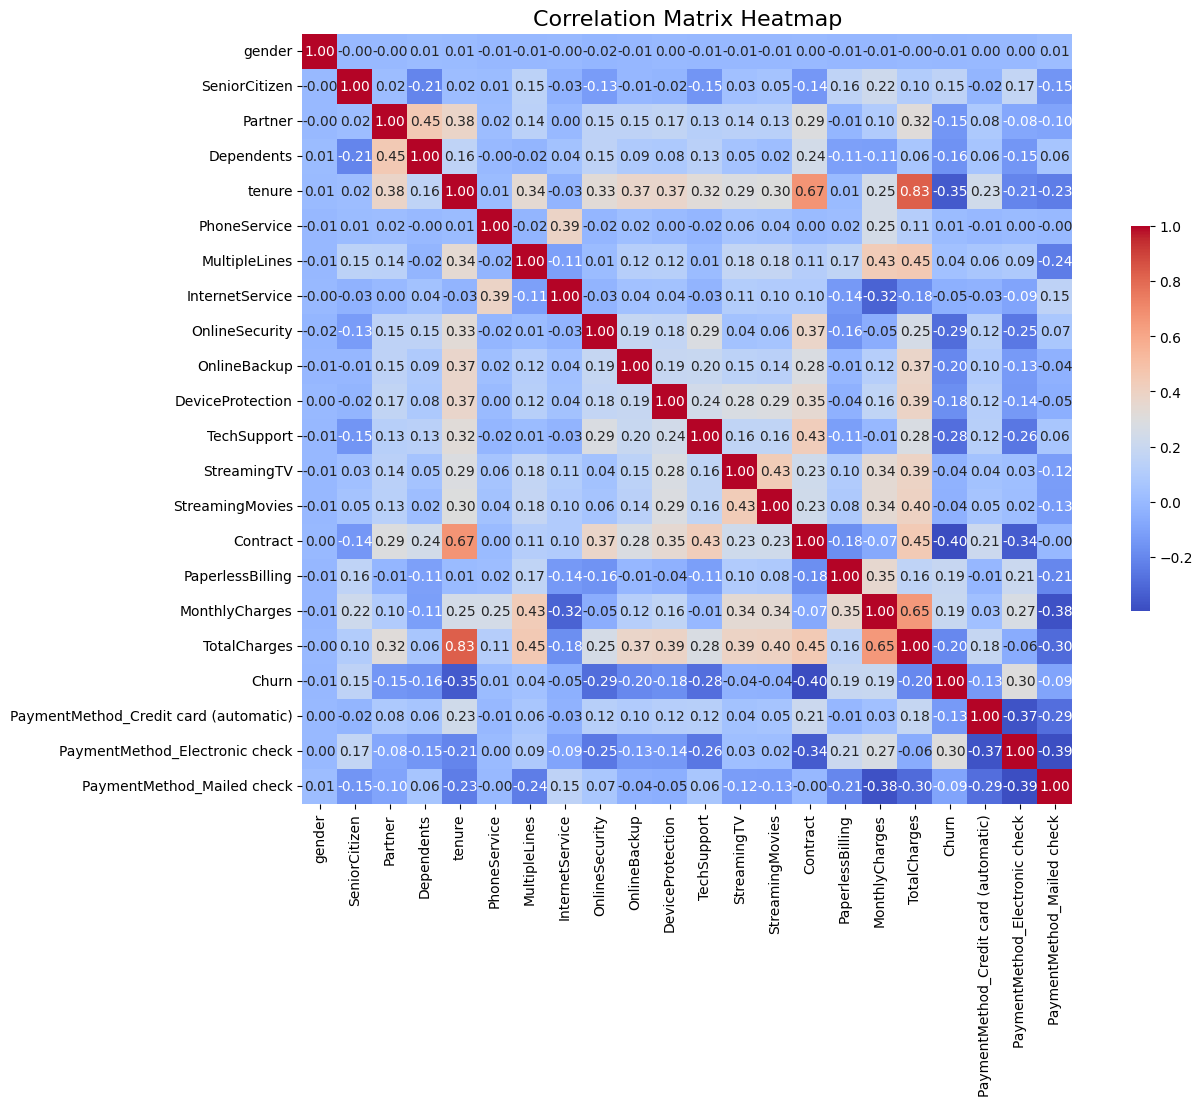

In [38]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# Set title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


In [43]:
# Find highly correlated features with 'Churn'
churn_correlation = corr_matrix['Churn']
print(churn_correlation[churn_correlation.abs() > 0.2])  # Adjust threshold as needed


tenure                           -0.352229
OnlineSecurity                   -0.289309
TechSupport                      -0.282492
Contract                         -0.396713
Churn                             1.000000
PaymentMethod_Electronic check    0.301919
Name: Churn, dtype: float64


In [44]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,Electronic check,70.70,151.65,1


**POINTS OF DISCUSSION**
* Should variables with categories ['Yes','No' ,'No internet service'] be generalized, with 'No' & 'No Internet Service' grouped in a similar category as 'No'?
* Maximum significance level = ~0.3
* Next approach: Variables with category 'No' & 'No Internet service' changed all to 'No'